In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
adv = pd.read_csv(r'C:\Users\Khushi Gupta\Python Scripts\Advertising.csv')
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
adv.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
adv.drop(['Unnamed: 0'], axis = 1, inplace = True)
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


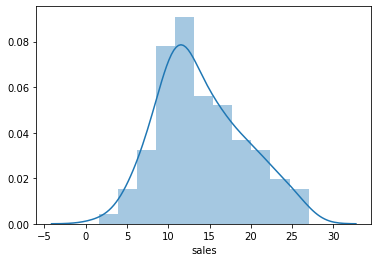

In [6]:
import seaborn as sns
sns.distplot(adv.sales);

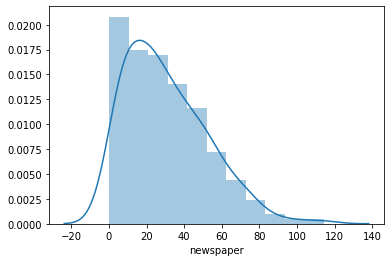

In [7]:
sns.distplot(adv.newspaper);

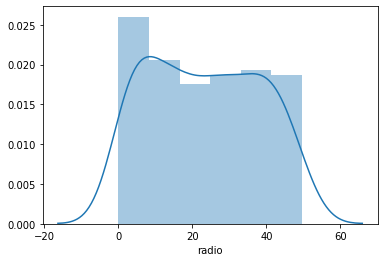

In [8]:
sns.distplot(adv.radio);

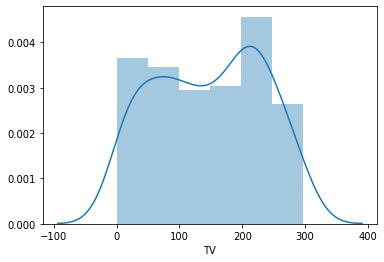

In [9]:
sns.distplot(adv.TV);

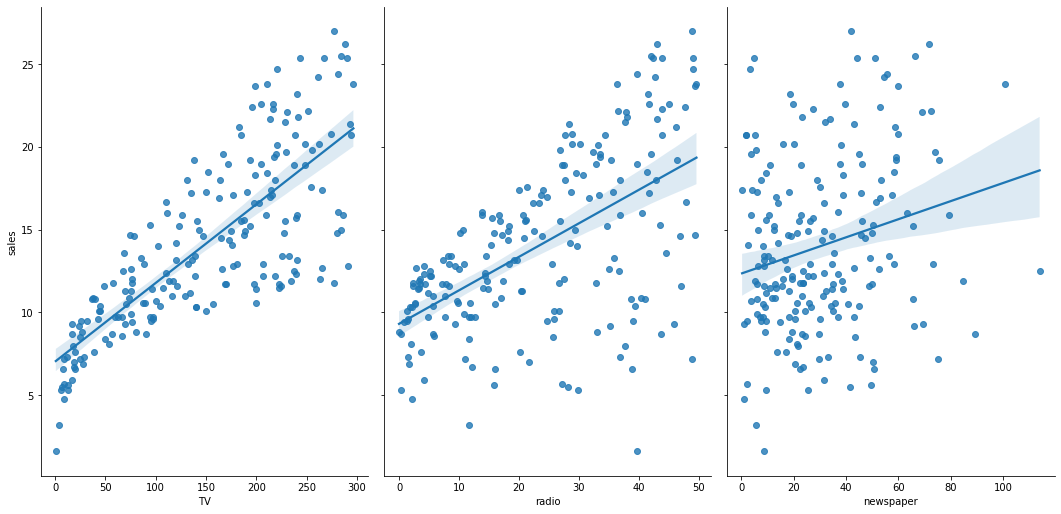

In [10]:
sns.pairplot(adv, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg');

In [12]:
adv.TV.corr(adv.sales)

0.7822244248616061

In [13]:
adv.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


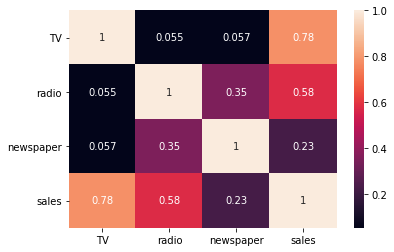

In [14]:
sns.heatmap( adv.corr(), annot=True );

In [15]:
x = adv[['TV']]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [17]:
y = adv.sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [20]:
from sklearn.linear_model import LinearRegression

linereg = LinearRegression()
linereg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(linereg.intercept_)
print(linereg.coef_)

6.91197261886872
[0.04802945]


In [22]:
zip(adv.TV, linereg.coef_)

In [23]:
y_pred = linereg.predict(x_test)

In [24]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

2.4643080986027908


In [25]:
print(metrics.mean_squared_error(y_test,y_pred))

10.310069587813155


In [26]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.210929707703542
